**Importing the packages**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.statespace.sarimax as sarima
import statsmodels.api as sm
from pandas import datetime
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
import seaborn as sns
sns.set()

C:\Users\sshre\AppData\Local\Temp\ipykernel_2456\3191867978.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
raw_csv_data = pd.read_csv("train.csv")
sd = raw_csv_data.copy()
sd.Date = pd.to_datetime(sd.Date, dayfirst = True)
sd.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


**Deleting rows which isn't necessary**

In [3]:
del sd['Store']
del sd['IsHoliday']
del sd['Dept']
sd.head()

,Date,Weekly_Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


**Setting frequency of Data as Weekly and Making Date as our index**

In [4]:
sd = sd[:143]
daterange = pd.date_range(start='2010-02-05', periods=len(sd), freq='W-FRI')

sd["dates"] = daterange
sd.set_index("dates", inplace = True)


del sd['Date']

sd.head()



,Weekly_Sales
dates,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90


In [5]:
data_s1 = sd.copy()


In [6]:
data_s1

,Weekly_Sales
dates,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-09-28,18947.81
2012-10-05,21904.47
2012-10-12,22764.01


**Weekly Sales Data Plot**

In [7]:
weekly_data = data_s1.resample('W').sum()

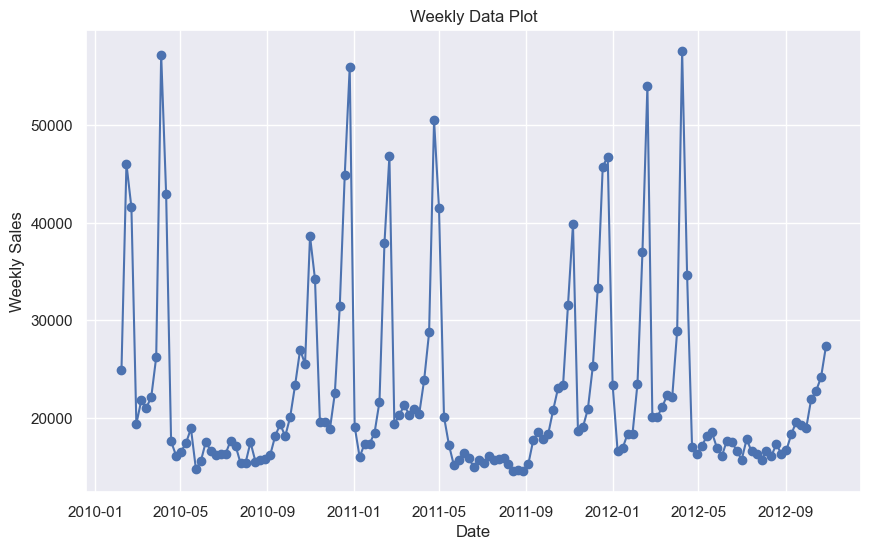

In [8]:
plt.figure(figsize=(10,6))
plt.plot(weekly_data.index, weekly_data['Weekly_Sales'], marker='o',linestyle='-',color='b')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Weekly Data Plot')
#plt.grid(True)
plt.show()

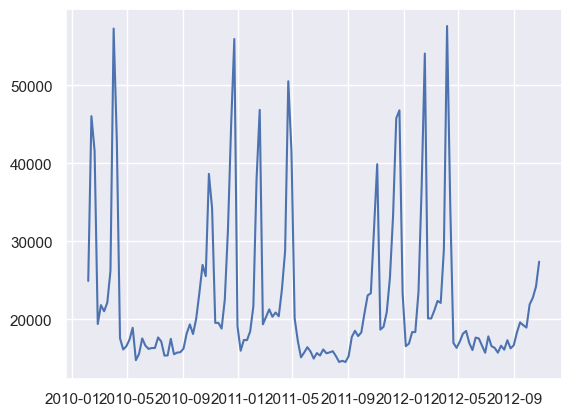

In [9]:
plt.plot(data_s1)
plt.show()

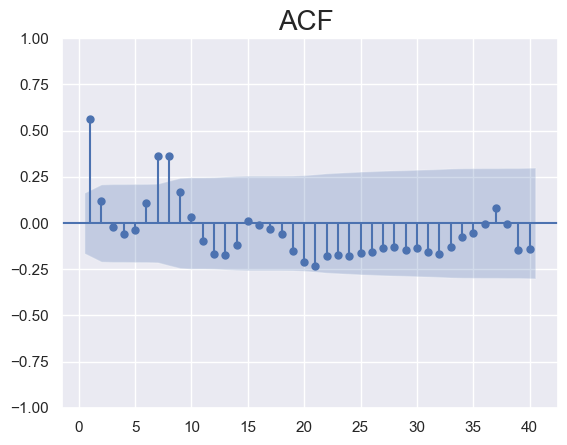

In [10]:
plot_acf(data_s1.Weekly_Sales, zero = False, lags = 40)
plt.title("ACF ", size = 20)
plt.show()

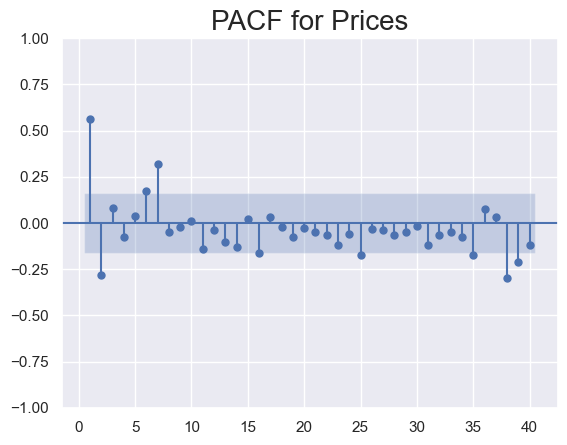

In [11]:
plot_pacf(data_s1.Weekly_Sales, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

**Decomposing the Data**

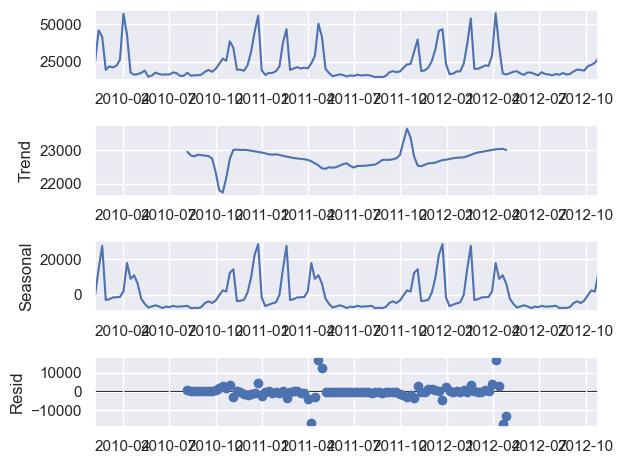

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data_s1, model="additive")
decompose_data.plot();

**Making Training and Testing Sets of the Data**

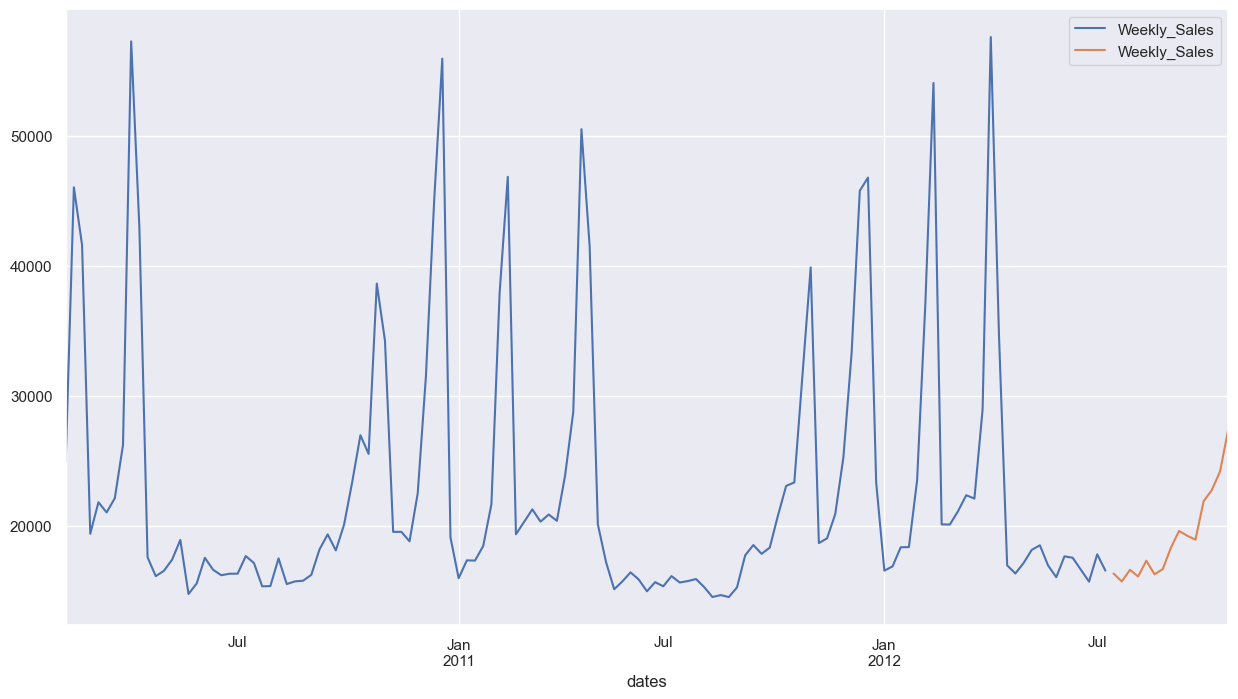

In [25]:
size = int(len(data_s1)*0.9)
train, test = data_s1.iloc[:size], data_s1.iloc[size:]
fig, ax = plt.subplots(figsize=(15,8));
train.plot(ax=ax)
test.plot(ax=ax)
plt.show()

**Running DF Test for our Data**

In [26]:
adfuller(data_s1.Weekly_Sales)

(-2.5221638686500385,
 0.1101743228258697,
 6,
 136,
 {'1%': -3.4793722137854926,
  '5%': -2.8830370378332995,
  '10%': -2.578233635380623},
 2638.475060753871)

**Fitting AR Model**

In [27]:
#model = sm.tsa.SARIMAX(train.Weekly_Sales, order=(2,0,0))
#model_fit = model.fit()
#model_fit.summary()

In [28]:
model = sm.tsa.SARIMAX(train.Weekly_Sales, order=(6,3,8))
model_fit = model.fit()
model_fit.summary()

C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\sshre\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  128
Model:               SARIMAX(6, 3, 8)   Log Likelihood               -1324.913
Date:                Fri, 21 Jul 2023   AIC                           2679.825
Time:                        20:11:56   BIC                           2722.250
Sample:                    02-05-2010   HQIC                          2697.060
                         - 07-13-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.9015      1.060     -1.794      0.073      -3.979       0.176
ar.L2         -2.3015      0.965     -2.385      0.017      -4.193      -0.410
ar.L3         -2.4368      1.469     -1.659      0.097      -5.317       0.443
ar.L4         -2.0659      1.155     -1.789      0.074      -4.330       0.198
ar.L5         -1.5094      1.044     -1.445      0.148      -3.556       0.537
ar.L6         -0.5523      0.559     -0.988      0.323      -1.647       0.543
ma.L1          0.1647      1.335      0.123      0.902      -2.451       2.781
ma.L2         -0.4850      1.165     -0.416      0.677      -2.769       1.799
ma.L3         -0.3385      0.555     -0.610      0.542      -1.426       0.749
ma.L4         -0.4517      0.689     -0.656      0.512      -1.802       0.899
ma.L5         -0.2455      0.343     -0.717      0.474      -0.917       0.426
ma.L6         -0.5728      1.005     -0.570      0.569      -2.542       1.397
ma.L7          0.4810      0.688      0.699      0.484      -0.867       1.829
ma.L8          0.7691      0.799      0.963      0.336      -0.796       2.335
sigma2       8.94e+07      1e-08    8.9e+15      0.000    8.94e+07    8.94e+07
===================================================================================
Ljung-Box (L1) (Q):                   1.86   Jarque-Bera (JB):               115.61
Prob(Q):                              0.17   Prob(JB):                         0.00
Heteroskedasticity (H):               1.35   Skew:                            -1.28
Prob(H) (two-sided):                  0.34   Kurtosis:                         6.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.06e+32. Standard errors may be unstable.
"""

In [29]:
pred = model_fit.predict(start=len(train), end = len(data_s1) + 4, dynamic = False)

<function matplotlib.pyplot.show(close=None, block=None)>

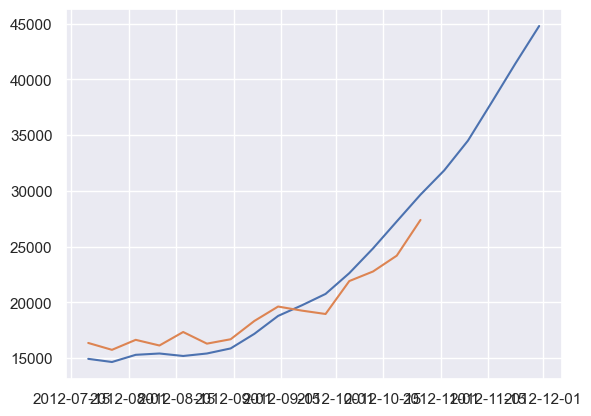

<Figure size 4000x500 with 0 Axes>

In [30]:
plt.plot(pred)

plt.plot(test)
plt.figure(figsize=(40,5))
plt.show

In [31]:
print(pred)

2012-07-20    14920.827410
2012-07-27    14637.739099
2012-08-03    15282.918473
2012-08-10    15401.625506
2012-08-17    15178.588870
2012-08-24    15401.902521
2012-08-31    15856.862266
2012-09-07    17167.364474
2012-09-14    18774.606680
2012-09-21    19724.945390
2012-09-28    20749.509851
2012-10-05    22614.478145
2012-10-12    24835.427898
2012-10-19    27257.474305
2012-10-26    29660.605833
2012-11-02    31840.400146
2012-11-09    34509.860616
2012-11-16    37947.808689
2012-11-23    41437.065041
2012-11-30    44802.113177
Freq: W-FRI, Name: predicted_mean, dtype: float64


In [32]:
#df = pd.DataFrame({'Predictions': pred})
#file_path = 'predictions.csv'
#df.to_csv(file_path, index=False)